In [2]:
import pandas as pd
from pyproj import Proj
from crdp import rdp
import numpy as np
import time
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

In [3]:
df = pd.read_csv("coords.csv")

In [4]:
df = df[['Latitude[deg]', 'Longitude[deg]']]

In [5]:
t= time.time()
lat = df['Latitude[deg]'].values
lon = df['Longitude[deg]'].values
# x = np.empty_like(lat)
# y = np.empty_like(lon)
p_str =  '+proj=utm +lat_0={} +lon_0={} +units=m +datum=WGS84 +no_defs'.format(
    lat[0], lon[0])
x, y = Proj(p_str)(lat, lon)
print(time.time() - t)

0.2033078670501709


In [10]:
t = time.time()
coords = [(a, b) for a, b in zip(x,y)]
reduced = rdp(coords, 1)
print(time.time()-t)

0.12384295463562012


In [11]:
rx = [c[0] for c in reduced]
ry = [c[1] for c in reduced]

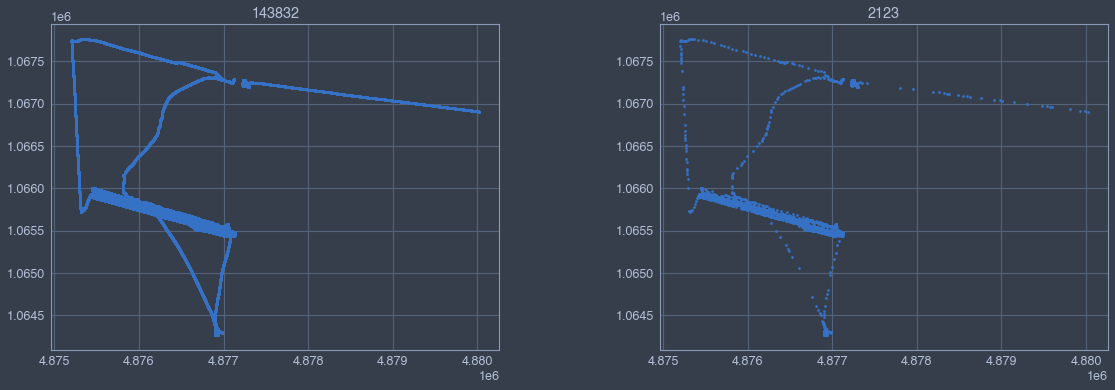

In [12]:
fig, axs = plt.subplots(1,2, figsize=(20,6))
for ax, n in zip(axs, [len(x), len(rx)]): ax.set_aspect('equal'); ax.set_title(n)
axs[0].plot(x, y, '.')
axs[1].plot(rx, ry, '.')
